In [5]:
import numpy as np
import pandas as pd
import os

# Clase 2 Visualización de Datos #
En esta clase aprenderemos a crear gráficos personalizados en Matplotlib a partir de datos en Pandas.

## Creando y salvando gráficos ##


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('classic') # Existen muchos estilos

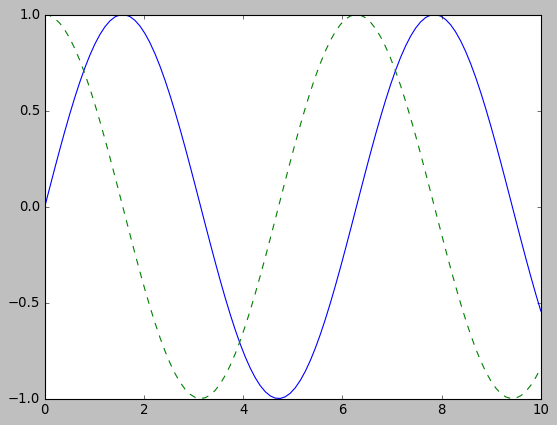

In [3]:
x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--')

In [6]:
IMGS_FOLDER = os.path.join('..', 'imgs')
if not os.path.exists(IMGS_FOLDER): os.mkdir(IMGS_FOLDER)
IMG1_URL = os.path.join(IMGS_FOLDER, '1.png')
fig.savefig(IMG1_URL)

In [7]:
!dir ..\imgs

 El volumen de la unidad C es Windows
 El n£mero de serie del volumen es: E854-2EA9

 Directorio de C:\Users\Sebasti n\Desktop\MLDiv\data-analysis-workshop-mldiv\imgs

07/10/2020  11:42 p. m.    <DIR>          .
07/10/2020  11:42 p. m.    <DIR>          ..
09/10/2020  12:58 p. m.            38,526 1.png
07/10/2020  11:42 p. m.           277,239 mapa_top.png
               2 archivos        315,765 bytes
               2 dirs  85,680,574,464 bytes libres


## Sintáxis básica ##

### Estructuras básicas ###
* Figure: Figura que contiene todo los gráficos, anotaciones y texto
* Axis: Gráfica en sí, con cierta configuración hecha

### MATLAB ###
La gráfica se encuentra en memoria, y debido a que plt() es stateful, cada llamada modificará la última gráfica en memoria. No existe una forma de modificar gráficas ya hechas.

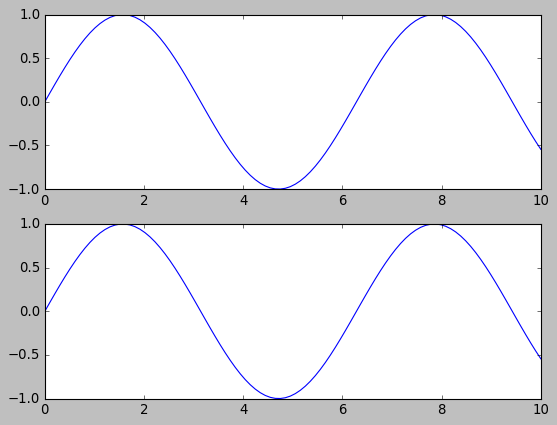

In [8]:
# FIGURA con dos gráficas
plt.figure() # creación de figura

plt.subplot(2, 1, 1) # (filas, columnas, no. de panel)
plt.plot(x, np.sin(x))

plt.subplot(2, 1, 2)
plt.plot(x, np.sin(x))

### Orientada a objetos ###
La llamada a figure() devuelve referencias a objetos en memoria, por lo que se pueden modificar una vez creados.

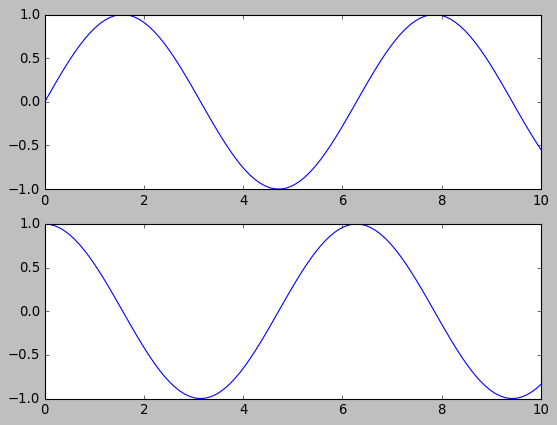

In [9]:
# FIGURA con dos gráficas
fig, ax = plt.subplots(2)

ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x))

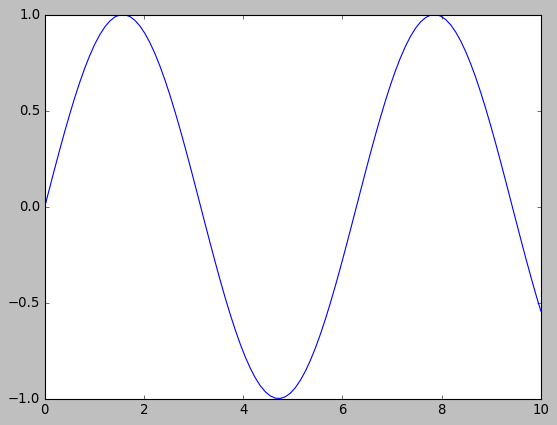

In [10]:
# Se puede usar así también
fig = plt.figure()
ax = plt.axes()

ax.plot(x, np.sin(x))

### Estilos ###

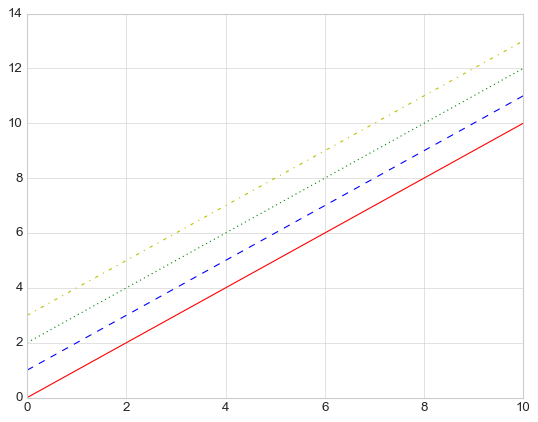

In [11]:
plt.style.use('seaborn-whitegrid')
plt.figure()

# Color y tipo de línea pueden ser expresados diferentemente
plt.plot(x, x, color='red', linestyle='solid')
plt.plot(x, x + 1, color='b', linestyle='dashed') # blue (rgbcmyk)
plt.plot(x, x + 2, color='g', linestyle=':') # dotted (-, --, :, -.)
plt.plot(x, x + 3, '-.y') # yellow y dashdot

### Ejes ###

(0.0, 10.0, -0.9993845576124357, 0.9996923408861117)

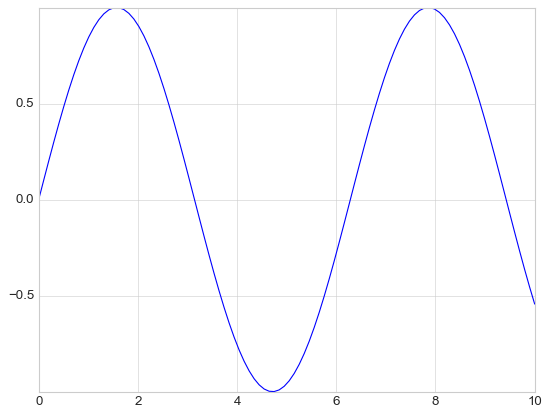

In [12]:
plt.plot(x, np.sin(x))

# Puedes establecer límites
plt.xlim(-2, 12)
plt.ylim(-2, 15)
# O elegir entre estilos predeterminados
plt.axis('tight') # o 'equal'

### Etiquetas y leyendas ###

(0.0, 10.0, -1.0, 1.0)

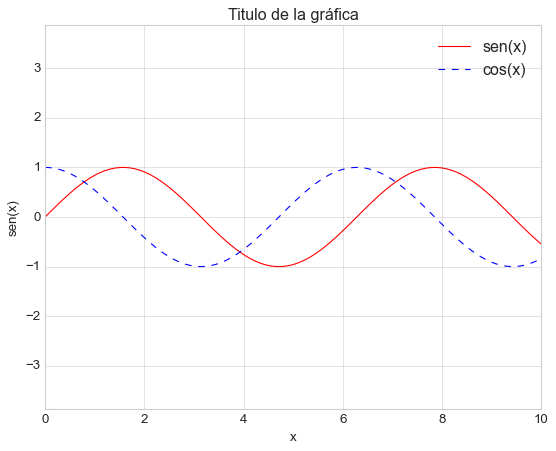

In [13]:
plt.plot(x, np.sin(x), '-r', label='sen(x)')
plt.plot(x, np.cos(x), '--b', label='cos(x)')
plt.title('Titulo de la gráfica')
plt.xlabel('x')
plt.ylabel('sen(x)')
plt.legend()

plt.axis('equal')

[(0.0, 10.0),
 (-2.0, 2.0),
 Text(0.5, 0, 'x'),
 Text(0, 0.5, 'sen(x)'),
 Text(0.5, 1.0, 'Gráfica')]

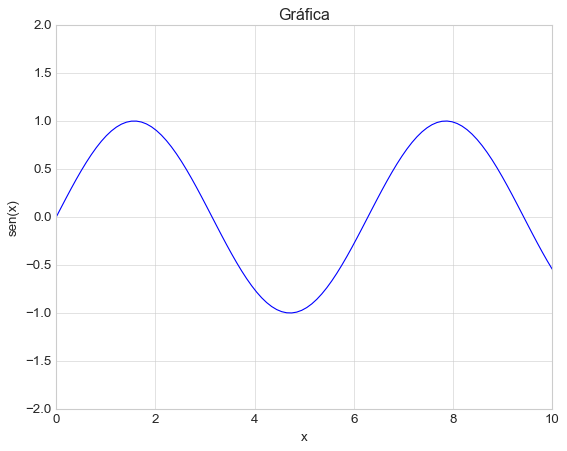

In [14]:
# Todo lo anterior se hace en POO de la sig. manera
ax = plt.axes()
ax.plot(x, np.sin (x))
ax.set(xlim=(0, 10), ylim=(-2, 2),
      xlabel='x', ylabel='sen(x)',
      title='Gráfica')

## Diferentes tipos de gráficas ##

### Gráficos de dispersión ###

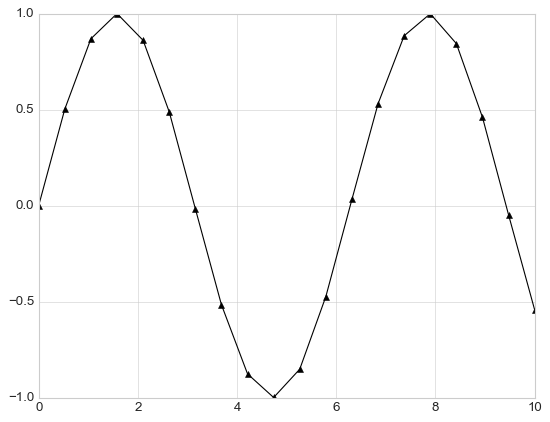

In [15]:
plt.style.use('seaborn-whitegrid')

x = np.linspace(0, 10, 20)
y = np.sin(x)

# linea,marca,color
plt.plot(x, y, '-^k') # Varios tipos: (o . ^ s d p x +)

(-1.2, 1.2)

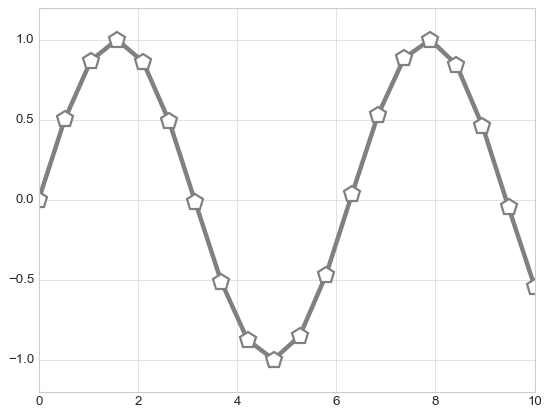

In [16]:
# Más personalización
plt.plot(x, y, '-p', color='gray', linewidth=4,
         markersize=15, markerfacecolor='white',
         markeredgecolor='gray', markeredgewidth=2)
plt.ylim(-1.2, 1.2)

#### Más opciones con plt.scatter ####
Permite que cada punto tenga su propia configuración personalizda, incluyendo colores, tamaños, transparencia, etc. Esencial cuando queremos visualizar instancias de datos.   
Sin embargo, es más lento, por lo que sólo debe utilizarse de ser necesario

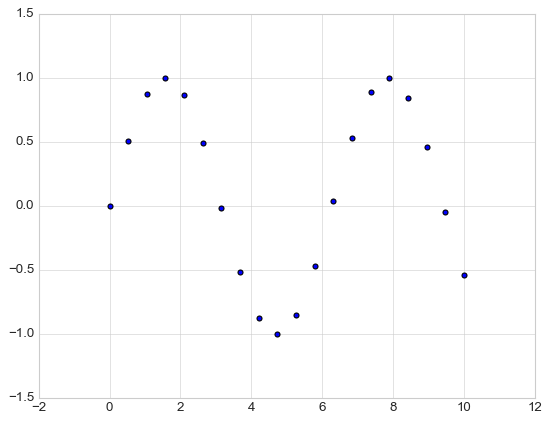

In [17]:
plt.scatter(x, y, marker='o')

In [18]:
# Dataset Iris, muy popular en análisis de datos
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.data.shape) # 150 instancias, 4 características
features = iris.data.T # Transponemos para mejor manejo

(150, 4)


Text(0.5, 1.0, 'Instancias de flores Iris')

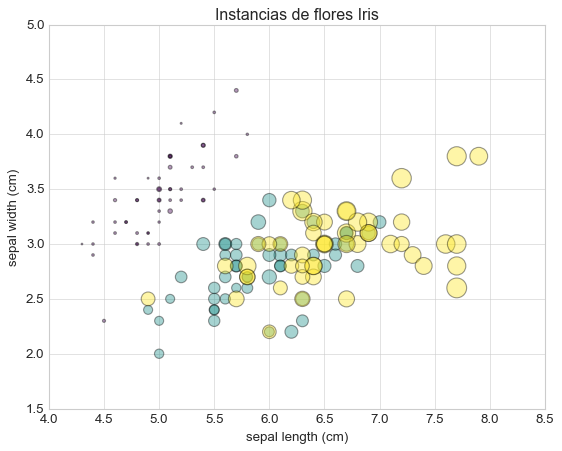

In [19]:
# Cada punto tiene su propia configuración
areas = features[2] * features[3] * 20 # size está en puntos
plt.scatter(features[0], features[1], alpha=0.4,
           s=areas, c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Instancias de flores Iris')

### Histogramas ###

In [20]:
data = np.random.randn(1000)

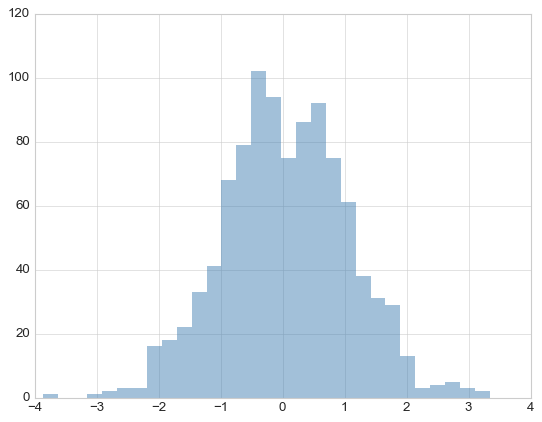

In [21]:
plt.hist(data, bins=30, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none')
plt.show()

In [22]:
# Manera más rápida de contar cuántas instancias existen en cada barra
counts, bi_edges = np.histogram(data, bins=5)
print(counts)

[  7 133 504 326  30]


In [23]:
x1 = np.random.normal(0, 0.5, 1000)
x2 = np.random.normal(-2, 1.5, 1000)
x3 = np.random.normal(3, 2, 1000)

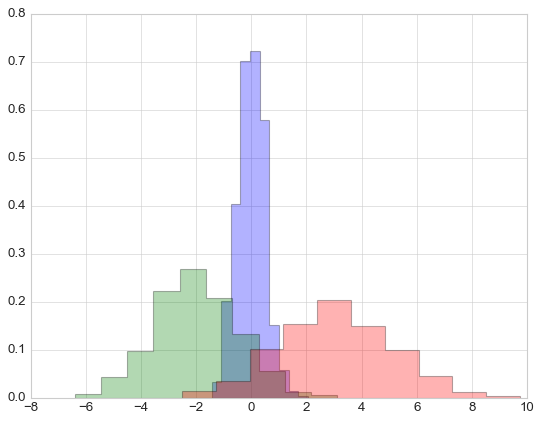

In [24]:
# Sin density=True, los histogramas son engañosos, debido a que mientras
# mas varianza exista, el ancho de la barra se reduce
kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=10)

# Poner ** desempaca el dic. como si las llaves=valores 
# se estuvieran declarando como parte de la firma de la función
plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs)
plt.show()

In [25]:
c1, _ = np.histogram(x1, bins=10)
c2, _ = np.histogram(x2, bins=10)
c3, _ = np.histogram(x3, bins=10)
c1, c2, c3

(array([ 11,  70, 141, 245, 252, 202,  53,  20,   5,   1], dtype=int32),
 array([  8,  41,  92, 211, 256, 197, 127,  52,  11,   5], dtype=int32),
 array([ 16,  43, 125, 189, 249, 184, 121,  54,  14,   5], dtype=int32))

#### Histogramas de dos dimensionaes ####

In [26]:
# Creamos datos aleatorios (se devuelven las absisas y ordenadas de cada instancia)
mean, cov = [0, 0], [[1, 1], [1, 2]]
# Se utiliza la transpuesta porque el vector está en forma vertical
x, y = np.random.multivariate_normal(mean, cov, 10000).T

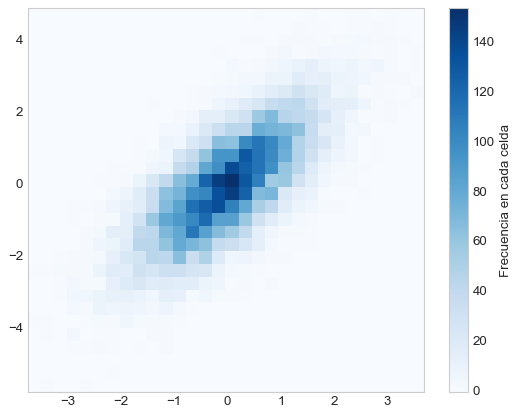

In [27]:
# bins denota la cantidad de espacios por cada eje. En total existen
# 30 x 30 celdas/espacios
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('Frecuencia en cada celda')

In [28]:
# Para saber más rápido los números
counts, xedges, yedges = np.histogram2d(x, y, bins=30)
counts.shape

(30, 30)

#### Estimación de la densidad del kernel ####

In [29]:
from scipy.stats import gaussian_kde

data = np.vstack([x, y]) # data.shape == (2, 10000)
kde = gaussian_kde(data)

xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

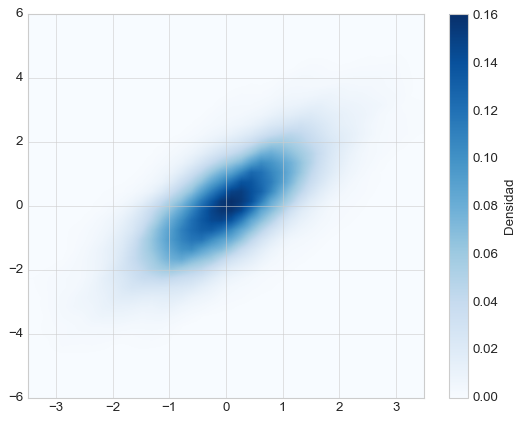

In [30]:
# Usamos imshow para poder usar gradientes
plt.imshow(Z.reshape(Xgrid.shape), origin='lower',
          aspect='auto', extent=[-3.5, 3.5, -6, 6], cmap='Blues')
cb = plt.colorbar()
cb.set_label('Densidad')

Otras opciones para hacer KDE:   
* sklearn.neighboors.KernelDensity
* statsmodels.nonparametric.kernel_density.KDEMultivariate   

Para visualización, Seaborn es reomendado

### Personalizando Leyendas ###

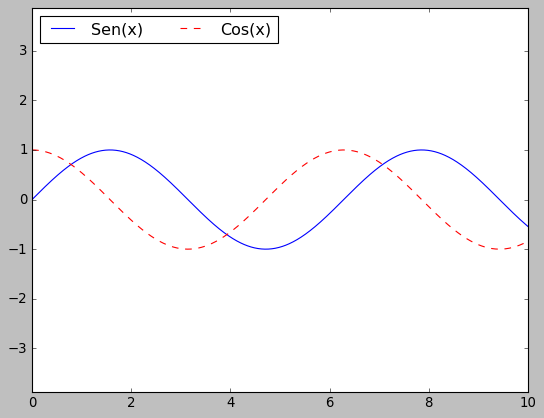

In [31]:
plt.style.use('classic')

x = np.linspace(0, 10, 1000)

fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sen(x)')
ax.plot(x, np.cos(x), '--r', label='Cos(x)')
ax.axis('equal')
# Lugar, Marco y Columnas
leg = ax.legend(loc='upper left', frameon=True, ncol=2)

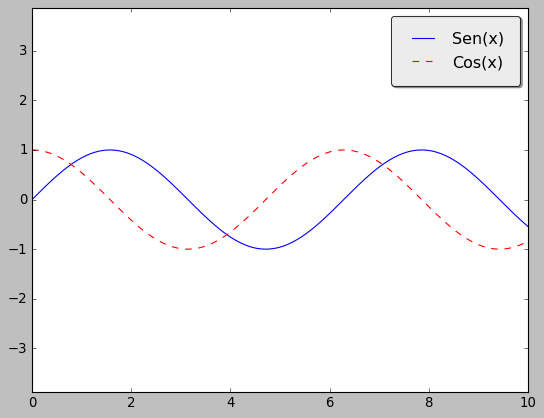

In [32]:
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sen(x)')
ax.plot(x, np.cos(x), '--r', label='Cos(x)')
ax.axis('equal')
# Cuadro redondeado, Transparencia, Sombra y Marco
leg = ax.legend(fancybox=True, framealpha=0.8, shadow=True,
               borderpad=1)

#### Tamaños en leyendas ####

In [33]:
x = np.random.uniform(0, 10, 100)
y = np.random.uniform(0, 10, 100)
areas = np.random.uniform(100, 1000, 100)
pop = np.random.uniform(10000, 100000, 100)

Text(0.5, 1.0, 'Ciudades')

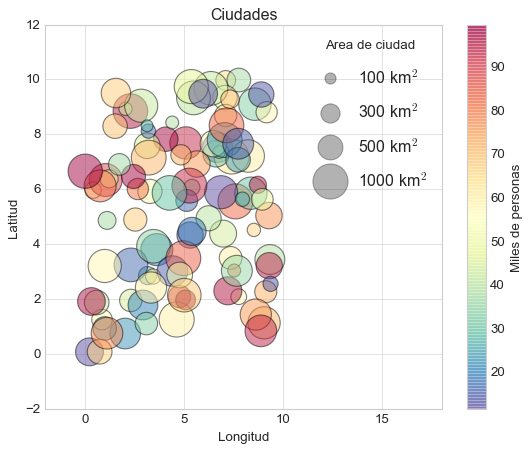

In [34]:
plt.style.use('seaborn-whitegrid')
plt.scatter(x, y, s=areas, c=pop/1000, 
            cmap='Spectral_r', alpha=0.5)
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.xlim([-2, 12])
plt.xlim([-2, 18])
plt.colorbar(label='Miles de personas')

# Fingimos graficar puntos especificos
for area in [100, 300, 500, 1000]:
    plt.scatter([], [], c='k', alpha=0.3, s=area,
               label=f'{area} km$^2$')

plt.legend(scatterpoints=1, frameon=False, title='Area de ciudad',
          labelspacing=1)
plt.title('Ciudades')

### Mapas discretos de colores ###

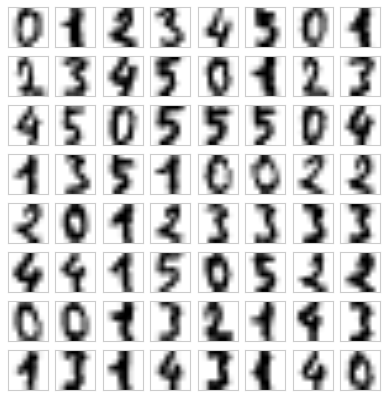

In [35]:
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)

fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

In [36]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
projection = iso.fit_transform(digits.data)

In [37]:
projection.shape # 1083 instancias, coordenada

(1083, 2)

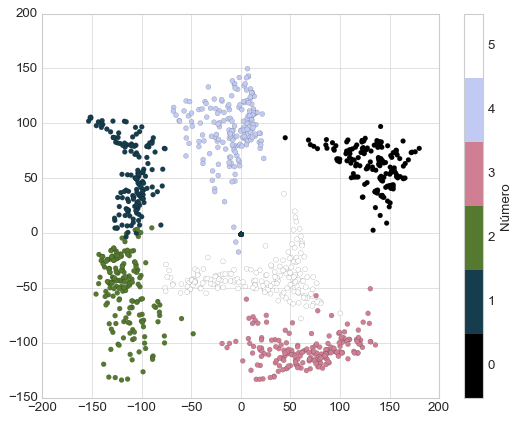

In [38]:
# Usa get_map(mapa, no. de secciones)
plt.scatter(projection[:,0], projection[:,1], lw=0.1,
           c=digits.target, cmap=plt.cm.get_cmap('cubehelix', 6))
plt.colorbar(ticks=range(6), label='Número')
plt.clim(-0.5, 5.5) # color limit

### Múltiples gráficas ###

In [39]:
plt.style.use('seaborn-white')

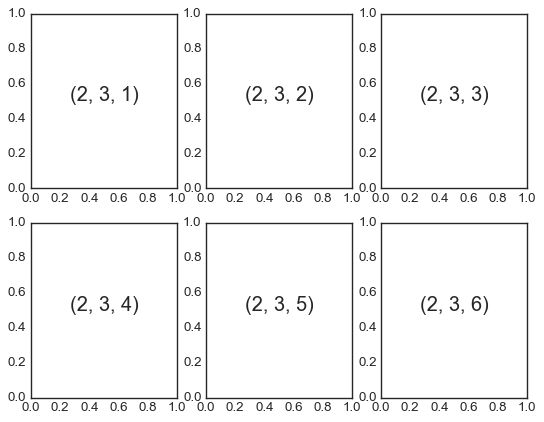

In [40]:
# Interface MATLAB
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)), fontsize=18, ha='center')

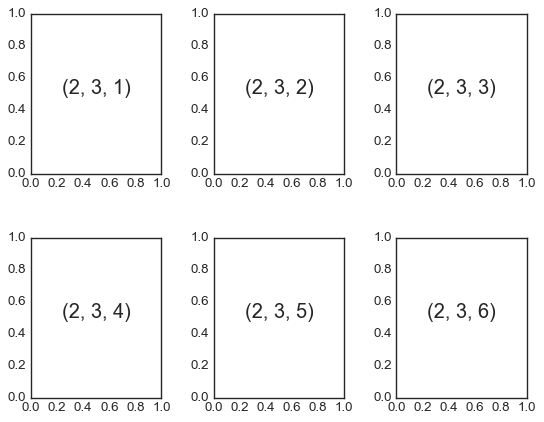

In [41]:
# Interface POO
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)), fontsize=18, ha='center')

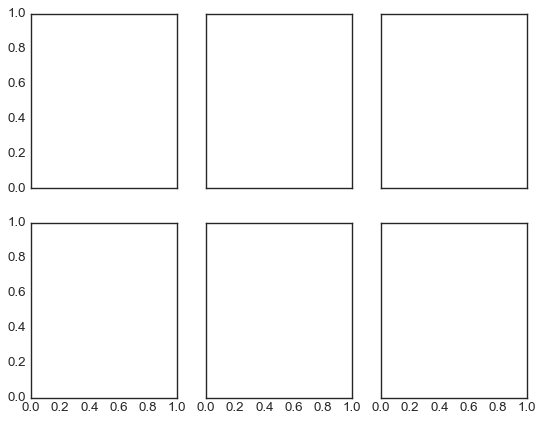

In [42]:
# De sopetón
# sharax y sharay eliminan anotaciones de los ejes internos
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

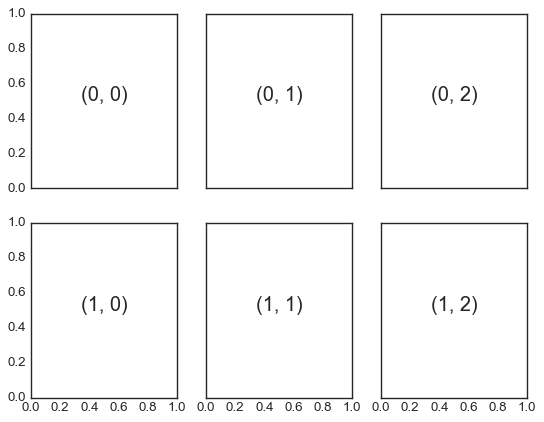

In [43]:
# For FILAS for COLUMNAS
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)), fontsize=18, ha='center')
fig # Nótese el fig en notación POO

#### GridSpec ####

In [44]:
# "Espacios" disponibles en un grilla
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)

<AxesSubplot:>

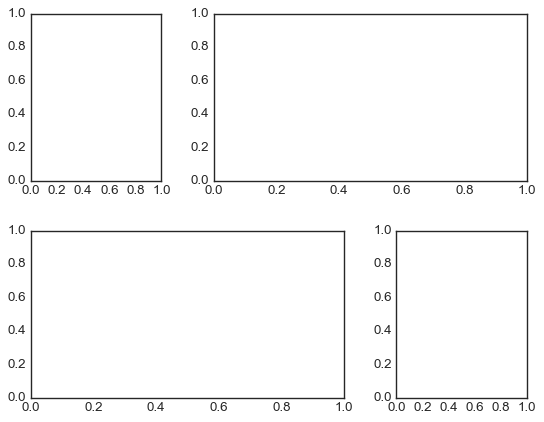

In [45]:
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:]) # Usa los ultimos dos espacios...
plt.subplot(grid[1, :2]) # ...o los dos primeros
plt.subplot(grid[1, 2])

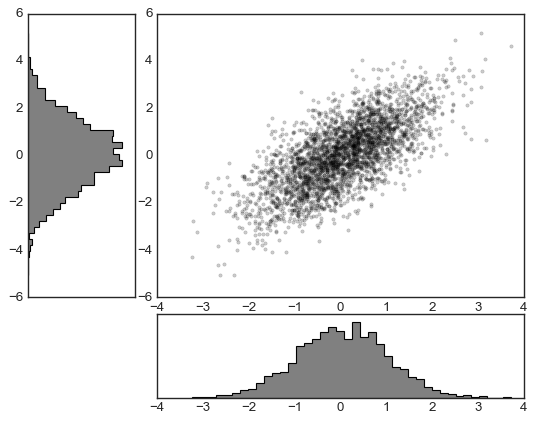

In [46]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

fig = plt.figure()
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)

main_ax = fig.add_subplot(grid[:-1, 1:])
# sharey y sharex pueden apuntar a un subplot también
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

x_hist.hist(x, 40, histtype='stepfilled', orientation='vertical', color='gray')
# x_hist.invert_yaxis()
y_hist.hist(y, 40, histtype='stepfilled', orientation='horizontal', color='gray')
# y_hist.invert_xaxis()
plt.show()

### Textos y Anotaciones ###

Text(0.2, 0.2, '. Fig: (0.2, 0.2)')

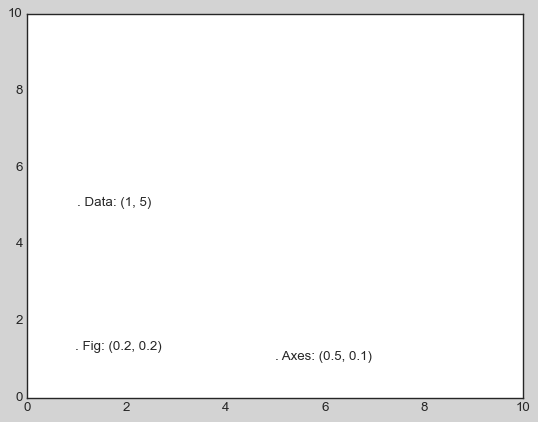

In [47]:
fig, ax = plt.subplots(facecolor='lightgray')
ax.axis([0, 10, 0, 10])

# Coords. relativas a datos, axes y la figura en su totalidad
ax.text(1, 5, ". Data: (1, 5)", transform=ax.transData)
ax.text(0.5, 0.1, ". Axes: (0.5, 0.1)", transform=ax.transAxes)
ax.text(0.2, 0.2, ". Fig: (0.2, 0.2)", transform=fig.transFigure)

### Ticks ###

#### Hiding tick in image plots ####

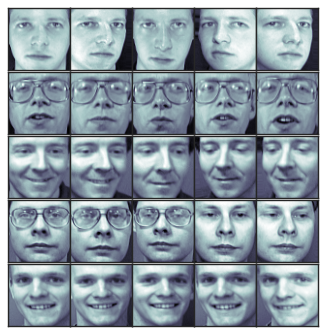

In [48]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces().images

fig, ax = plt.subplots(5, 5, figsize=(5,5))
fig.subplots_adjust(hspace=0, wspace=0)

for i in range(5):
    for j in range(5):
        ax[i, j].xaxis.set_major_locator(plt.NullLocator())
        ax[i, j].yaxis.set_major_locator(plt.NullLocator())
        ax[i, j].imshow(faces[10 * i + j], cmap='bone')

#### Crowded ticks ####

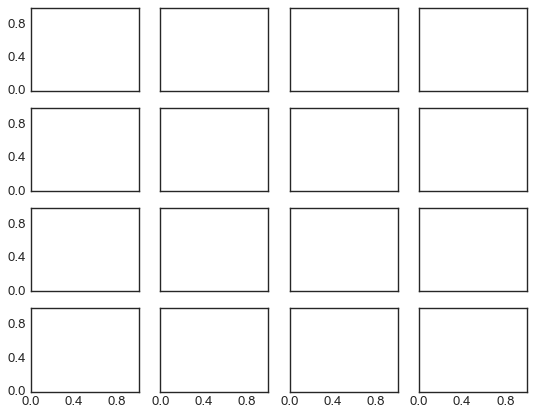

In [49]:
fig, ax = plt.subplots(4, 4, sharex=True, sharey=True)

for axi in ax.flat:
    # Máximo 3 ticks por subplot
    axi.xaxis.set_major_locator(plt.MaxNLocator(3))
    axi.yaxis.set_major_locator(plt.MaxNLocator(3))

#### Custom ticks ####

In [76]:
# Una función que toma el valor del tick sobre alguno de los ejes
# y devuelve una etiqueta para ese tick
def format_func(value, tick_number):
    # Se usa 2 * porque majamos medios
    N = int(np.round(2 * value / np.pi))
    if N == 0: return '0'
    elif N == 1: return r'$\pi/2$'
    elif N == 2: return r'$\pi$'
    elif N % 2 != 0: return r'${0}\pi/2$'.format(N)
    else: return r'${0}\pi$'.format(N // 2)

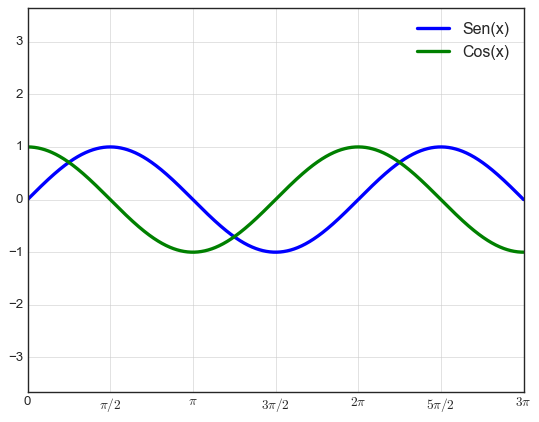

In [79]:
# Datos
x = np.linspace(0, 3 * np.pi, 1000)

# Figura
fig, ax =plt.subplots()
ax.plot(x, np.sin(x), lw=3, label='Sen(x)')
ax.plot(x, np.cos(x), lw=3, label='Cos(x)')
# Config. adicional
ax.grid(True)
ax.axis('equal')
ax.set_xlim(0, 3 * np.pi)
ax.legend()

# Ticks personalizados
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi/2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi/4))
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))

MÁS TIPOS DE LOCATORS
* NullLocator (sin ticks)
* FixedLocator (ticks en lugares específicos)
* LinearLocator (Ticks equidistantes unos de otros, desde min hasta max)
* MultipleLocator
* MaxNLocator (hasta n ticks, con posiciones automáticas)
* AutoLocator (por defecto)
* AutoMinorLocator (Locator para ticks menores)

### Estilos ###

In [81]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [82]:
def hist_and_lines():
    np.random.seed(0)
    fig, ax = plt.subplots(1, 2, figsize=(11, 4))
    ax[0].hist(np.random.randn(1000))
    for i in range(3):
        ax[1].plot(np.random.rand(10))
    ax[1].legend(['a', 'b', 'c'], loc='lower left')

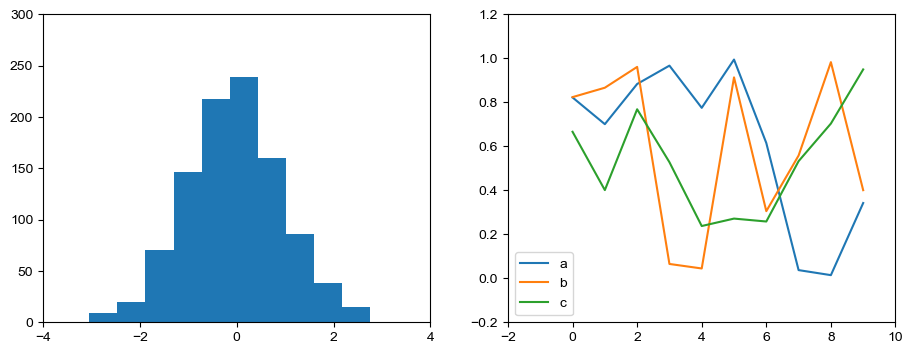

In [83]:
# Se puede usar plt.style.use('default') también
with plt.style.context('default'):
    hist_and_lines()

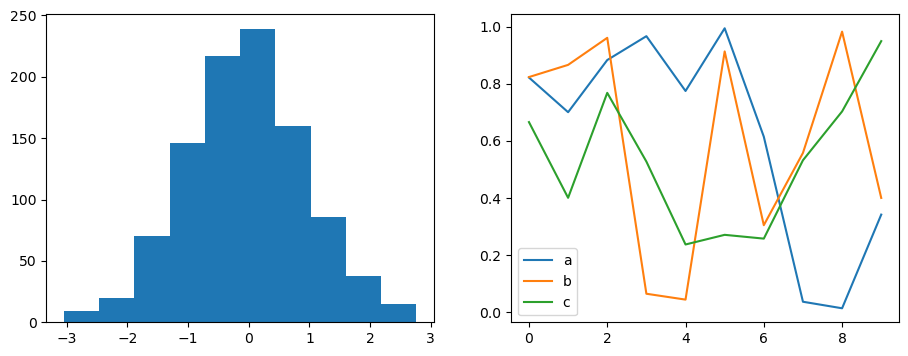

In [84]:
plt.style.use('default')
hist_and_lines()

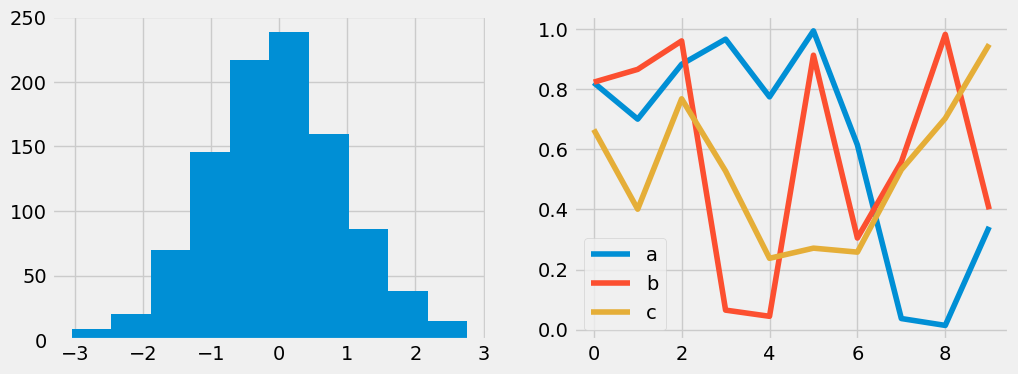

In [85]:
# 5.38 es una página web con un estilo característico
plt.style.use('fivethirtyeight')
hist_and_lines()

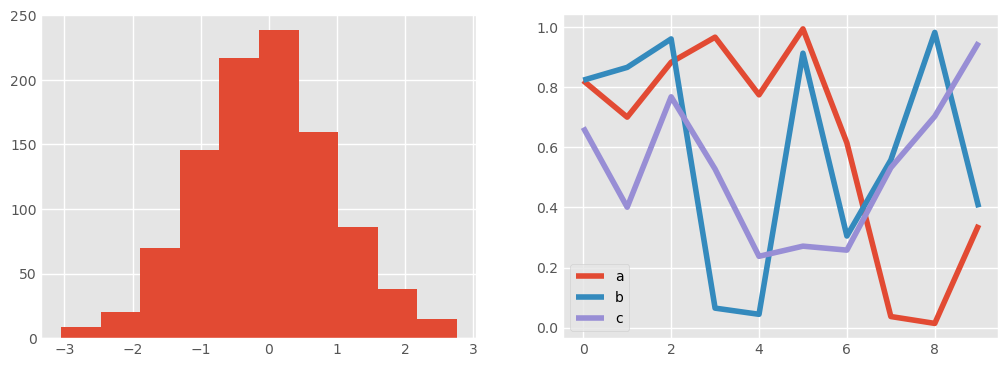

In [86]:
# Similar a ggplot, una librería de R
plt.style.use('ggplot')
hist_and_lines()

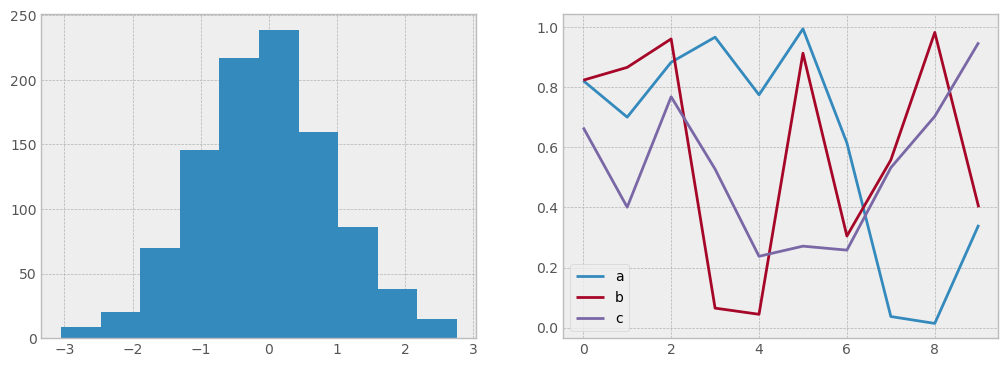

In [87]:
# Basado en el libro Bayesian Methods for Hackers
plt.style.use('bmh')
hist_and_lines()

### Gráficos de pastel ###

In [ ]:
# Catálogos de cada campo
catalogo = {
    'SEXO': { 1: 'MUJER', 2: 'HOMBRE' },
    'SI_NO': { 0: 'NO', 1: 'SI'},
    'RESULTADO': { 1: 'ACTIVO', 3: 'SOSPECHOSO'}
}

### Gráficos de contorno ###

In [ ]:
def altura(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

x = np.linspace(0, 5, 50) # Más espacios resultan en gráficas más suaves
y = np.linspace(0, 5, 50)


X, Y = np.meshgrid(x, y) # Crea matrices representando x y y en un plano
Z = altura(X, Y)

In [ ]:
# Las líneas punteadas son valores negativos
plt.contour(X, Y, Z, colors='black')

In [ ]:
# levels define el número máximo de líneas dibujadas
plt.contour(X, Y, Z, levels=30, cmap='Spectral_r') # la r a final indica "al revés"

#### Rellenando espacio entre contornos con contourf() ####

In [ ]:
# La gráfica es más nítida, no necesita tantas líneas
plt.contourf(X, Y, Z, 15, cmap='Spectral_r')
plt.colorbar()

#### Usando plt.imshow() para gradientes de color ####

In [ ]:
# Se necesitan especificar los límites, al igual que la esquina que será el origen (0,0)
# imshow interpreta la malla como si existiera un efecto de escalado horizontal
plt.imshow(Z, extent=[0, 10, 0, 5], origin='lower', cmap='Spectral_r')
plt.colorbar()

#### Combinaciones entre variantes ####

In [ ]:
fig = plt.figure()
# Primero el gráfico de contornos es graficado y almacenado
contours = plt.contour(X, Y, Z, 3, colors='black')
# Se añaden etiquetas a los contornos
plt.clabel(contours, inline=True, fontsize=8)
# Luego se añaden los gradientes de color, junto con un alpha para no saturar
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
          cmap='Spectral_r', alpha=0.8)
plt.colorbar()

In [ ]:
IMG_URL = os.path.join(IMGS_FOLDER, 'mapa_top.png')
if not os.path.exists(IMG_URL): fig.savefig(IMG_URL)

### Más sobre Visualización ###
* Otras ibrerías de visualización: Seaborn, Plotly
* Otros tipos de gráficas: mapas choroplet, heatmaps, etc
* Gráficos interactivos
* Gráficos en 3D
* Geovisualización con pandasGIS
* Visualización de datos de lata dimensionalidad
* Visualización de datos basados en texto